# Image CLASSIFICATION USING CNN

In [33]:
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K


from keras.models import load_model
from keras.preprocessing import image
import numpy as np
from os import listdir
from os.path import isfile, join

### Set hyper parameters


In [1]:
#ReShaping the images to same size
img_width = 150
img_height = 150

train_data_dir = 'D:/data/train'
validation_data_dir = 'D:/data/test'
train_samples = 20
validation_samples = 10
epochs = 100
batch_size = 2
fc_size=32 #size of the output of final FC layer
input_shape = (img_width, img_height, 3)

### The model defined with  the following layers
- input later
- conv layer 1 with 32 filters of kernel  size[5,5],
- pooling layer 1 with pool size[2,2] and stride 2
- conv layer 2 with 64 filters of kernel  size[5,5],
- pooling layer 2 with pool size[2,2] and stride 2
- dense layer whose output size is fixed in the hyper parameter: fc_size=32
- drop out layer with droput probability 0.4
- predict the class by doing a softmax on the output of the dropout layers

Training
- For training fefine the loss function and minimize it
- For evaluation calculate the accuracy


In [62]:
import tensorflow as tf

model = Sequential()
model.add(tf.keras.layers.BatchNormalization(input_shape=input_shape))

model.add(tf.keras.layers.Conv2D(32, kernel_size=(5,5), strides=2,activation=tf.keras.layers.LeakyReLU(alpha=0.05)))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(64, kernel_size=(5,5), strides=2,activation=tf.keras.layers.LeakyReLU(alpha=0.05)))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units = fc_size, activation=tf.keras.layers.LeakyReLU(alpha=0.03)))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(64, activation=tf.keras.layers.LeakyReLU(alpha=0.03)))
#Output layer
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))


In [63]:
import keras
from keras import optimizers
model.compile(loss='binary_crossentropy', 
              optimizer=keras.optimizers.Adam(lr=.0001),
              metrics=['accuracy'])

ImageDatagenerator will run through your image data and apply random transformations to each individual image as it is passed to the model so that it never sees the exact same image twice during training. 

These transformations are parameters on the generator that can be set when instantiated and can include rotations, shears, flips, and zooms. 

The benefit here is that the model will become more robust as it trains on images that are slightly distorted, and it helps to prevent the model from learning noise in your data such as where features are located in the image.

In [52]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# for testing:
# only rescaling, avoiding having same training and validation data.
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [53]:

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 40 images belonging to 2 classes.


In [54]:
print(train_generator.class_indices)

{'cats': 0, 'dogs': 1}


In [55]:
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 20 images belonging to 2 classes.


In [64]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_samples // batch_size)

Epoch 1/100
10/10 [==============================] - 1s 48ms/step - loss: 0.7209 - accuracy: 0.3120 - val_loss: 0.6853 - val_accuracy: 0.6000
Epoch 2/100
10/10 [==============================] - 0s 32ms/step - loss: 0.6493 - accuracy: 0.7674 - val_loss: 0.7035 - val_accuracy: 0.4000
Epoch 3/100
10/10 [==============================] - 0s 32ms/step - loss: 0.6993 - accuracy: 0.5286 - val_loss: 0.6917 - val_accuracy: 0.6000
Epoch 4/100
10/10 [==============================] - 0s 31ms/step - loss: 0.6938 - accuracy: 0.5894 - val_loss: 0.6921 - val_accuracy: 0.6000
Epoch 5/100
10/10 [==============================] - 0s 30ms/step - loss: 0.7196 - accuracy: 0.3684 - val_loss: 0.7021 - val_accuracy: 0.4000
Epoch 6/100
10/10 [==============================] - 0s 32ms/step - loss: 0.6933 - accuracy: 0.4149 - val_loss: 0.6911 - val_accuracy: 0.5000
Epoch 7/100
10/10 [==============================] - 0s 37ms/step - loss: 0.6506 - accuracy: 0.6822 - val_loss: 0.6887 - val_accuracy: 0.5000
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


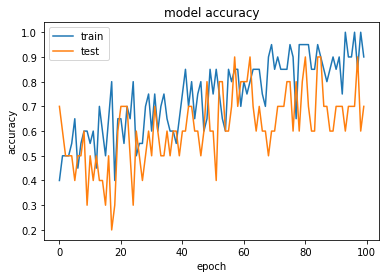

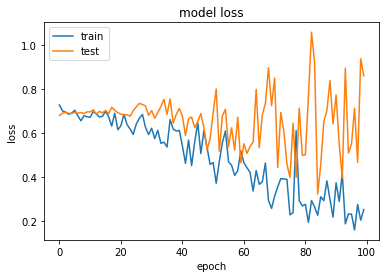

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()